# 🚗TRIPFARE : PREDICTING URBANTAXI FARE WITH MACHINE LEARNING

# 1.DATA COLLECTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('taxi_fare.csv')

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


#  2.DATA UNDERSTANDING

### SHAPE AND STRUCTURE

In [4]:
df.shape

(212345, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

**STATISTICAL SUMMARY OF NUMERICAL DATA** 

In [6]:
df.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


**CHECKING NULL/MISSING VALUES**

In [7]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

**CHECKING DATA TYPES**

In [9]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

**CHECKING DUPLICATES**

In [10]:
df.duplicated().sum()

0

# 3.DATA CLEANING

## 3.1.CREATING TRIP_DISTANCE COLUMN USING HAVERSINE FORMULA

In [11]:
import numpy as np

# Earth radius in kilometers
R = 6371  

# Convert degrees to radians
pickup_lat = np.radians(df['pickup_latitude'])
pickup_lon = np.radians(df['pickup_longitude'])
dropoff_lat = np.radians(df['dropoff_latitude'])
dropoff_lon = np.radians(df['dropoff_longitude'])

# Calculate differences
dlat = dropoff_lat - pickup_lat
dlon = dropoff_lon - pickup_lon

# Haversine formula
a = np.sin(dlat / 2) ** 2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon / 2) ** 2
c = 2 * np.arcsin(np.sqrt(a))

# Distance in kilometers
df['trip_distance'] = R * c

#trip_distance round off  to 2 decimal values
df['trip_distance'] = np.round(df['trip_distance'], 2)

In [12]:
df.shape

(212345, 19)

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40


In [14]:
df.shape

(212345, 19)

## 3.2.CHECKING DATE COLUMN DAGTA TYPE

In [15]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object

### CONVERTING STRING TO DATE FORMAT

In [16]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [17]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object

In [18]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance
0,1,2016-03-01,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14
1,1,2016-03-01,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30
2,2,2016-03-01,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60
3,2,2016-03-01,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05
4,2,2016-03-01,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40


### CONVERT PICKUP_DATETIME FROM UTC TO EDT

In [19]:
# Step 1: convert to UTC (if it's naive / timezone-unaware)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert from UTC to US/Eastern (will automatically apply EDT/EST depending on date)
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

In [20]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40


## 3.3.CREATING PICKUP_DAYOFWEEK AND PICKUP_DAY COLUMN

### EXTRACT AND CREATE DAY OF WEEK

In [21]:
# Extract day of week: Monday=0, Sunday=6// weekday or weekend
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

### CREATE PICKUP_DAY COLUMN

In [22]:
# Create 'pickup_day' column: Weekday or Weekend
df['pickup_day'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [23]:
df['pickup_dayofweek'].unique()

array([0, 3, 1], dtype=int64)

In [24]:
df['pickup_dayofweek'].value_counts()

1    112944
3     81783
0     17618
Name: pickup_dayofweek, dtype: int64

In [25]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day
104382,1,2016-03-01 01:42:57-05:00,2016-03-01 07:31:41,1,-73.962875,40.661907,1,N,-73.958763,40.777878,...,41.0,0.0,0.5,3.00,0.00,0.3,44.80,12.90,1,Weekday
73643,2,2016-02-29 19:41:52-05:00,2016-03-01 00:47:06,6,-73.986320,40.767200,1,N,-74.000244,40.742779,...,7.5,0.5,0.5,0.00,0.00,0.3,8.80,2.96,0,Weekday
84019,1,2016-02-29 21:36:36-05:00,2016-03-01 02:46:10,1,-73.979195,40.752960,1,N,-74.006401,40.743752,...,9.5,0.5,0.5,2.15,0.00,0.3,12.95,2.51,0,Weekday
519,2,2016-03-10 02:09:34-05:00,2016-03-10 07:19:40,2,-73.991631,40.770142,1,N,-73.991867,40.745216,...,9.5,0.0,0.5,2.06,0.00,0.3,12.36,2.77,3,Weekday
158237,1,2016-03-01 04:27:09-05:00,2016-03-01 09:42:44,1,-74.011208,40.715355,1,N,-73.991600,40.731808,...,12.5,0.0,0.5,0.00,0.00,0.3,13.30,2.47,1,Weekday
85460,1,2016-02-29 22:15:57-05:00,2016-03-01 03:24:54,1,-73.978775,40.765133,1,N,-73.969299,40.792007,...,9.5,0.5,0.5,0.00,0.00,0.3,10.80,3.09,0,Weekday
143623,2,2016-03-01 03:45:40-05:00,2016-03-01 09:10:41,1,-73.939560,40.751678,1,N,-74.003197,40.708309,...,23.5,0.0,0.5,3.00,0.00,0.3,27.30,7.21,1,Weekday
136464,1,2016-03-01 03:26:19-05:00,2016-03-01 08:33:35,3,-73.996597,40.723915,1,N,-74.010986,40.716114,...,6.5,0.0,0.5,1.00,0.00,0.3,8.30,1.49,1,Weekday
126328,1,2016-03-01 02:57:29-05:00,2016-03-01 09:06:39,1,-73.781853,40.644859,2,N,-73.988045,40.728165,...,52.0,0.0,0.5,13.00,5.54,0.3,71.34,19.70,1,Weekday
182367,1,2016-03-01 05:29:31-05:00,2016-03-01 10:41:02,1,-73.981125,40.763802,1,N,-73.986656,40.754147,...,8.5,0.0,0.5,1.85,0.00,0.3,11.15,1.17,1,Weekday


**NAME OF THE PICKUP_DAY**

In [26]:
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

In [27]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.14,0,Monday
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.30,0,Monday
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.60,0,Monday
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.05,0,Monday
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.40,0,Monday


In [28]:
df.sample(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day
116211,2,2016-03-01 02:29:05-05:00,2016-03-01 07:34:16,2,-73.977592,40.725979,1,N,-73.989799,40.729832,...,5.5,0.0,0.5,1.26,0.00,0.3,7.56,1.11,1,Tuesday
23955,2,2016-03-10 04:13:02-05:00,2016-03-10 09:23:38,1,-73.979332,40.735741,1,N,-73.973907,40.748772,...,8.5,0.0,0.5,0.00,0.00,0.3,9.30,1.52,3,Thursday
9728,2,2016-03-10 03:00:01-05:00,2016-03-10 08:15:38,1,-73.959465,40.762997,1,N,-73.985664,40.746567,...,13.0,0.0,0.5,2.76,0.00,0.3,16.56,2.86,3,Thursday
34809,2,2016-03-10 05:16:16-05:00,2016-03-10 10:52:11,1,-73.981400,40.753601,2,N,-73.803047,40.648029,...,52.0,0.0,0.5,8.00,5.54,0.3,66.34,19.08,3,Thursday
13554,2,2016-03-10 03:19:31-05:00,2016-03-10 08:22:42,1,-74.000198,40.743061,1,N,-73.994637,40.750511,...,4.5,0.0,0.5,1.06,0.00,0.3,6.36,0.95,3,Thursday
121280,2,2016-03-01 02:43:42-05:00,2016-03-01 08:08:54,1,-73.988708,40.693710,1,N,-73.938530,40.679047,...,18.5,0.0,0.5,3.86,0.00,0.3,23.16,4.53,1,Tuesday
40565,2,2016-03-10 05:52:17-05:00,2016-03-10 11:07:00,1,-73.984612,40.739738,1,N,-74.003273,40.756248,...,11.5,0.0,0.5,3.08,0.00,0.3,15.38,2.42,3,Thursday
2173,2,2016-03-10 02:19:58-05:00,2016-03-10 07:24:16,1,-73.983513,40.761761,1,N,-73.977470,40.754700,...,5.0,0.0,0.5,1.16,0.00,0.3,6.96,0.94,3,Thursday
141612,2,2016-03-01 03:40:35-05:00,2016-03-01 08:46:53,1,-73.978989,40.763908,1,N,-73.970032,40.762676,...,5.5,0.0,0.5,0.00,0.00,0.3,6.30,0.77,1,Tuesday
101620,1,2016-03-01 01:28:08-05:00,2016-03-01 06:36:44,1,-73.953262,40.771774,1,N,-73.978554,40.752735,...,9.5,0.0,0.5,1.50,0.00,0.3,11.80,3.00,1,Tuesday


## 3.4.CREATING AM/PM COLUMN

### EXTRACT AM AND PM

In [29]:
# Extract AM or PM
df['am_pm'] = df['tpep_pickup_datetime'].dt.hour.apply(lambda x: 'AM' if x < 12 else 'PM')

In [30]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,0.5,2.05,0.00,0.3,12.35,3.14,0,Monday,PM
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,0.5,3.05,0.00,0.3,15.35,4.30,0,Monday,PM
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,0.5,8.00,0.00,0.3,63.80,16.60,0,Monday,PM
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.0,0.5,3.78,5.54,0.3,41.62,9.05,0,Monday,PM
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.0,0.00,15.50,0.3,113.80,20.40,0,Monday,PM


### LABEL ENCODING

#### AM -->0
#### PM -->1

In [31]:
df['am_pm'] = df['am_pm'].apply(lambda x: 0 if x == 'AM' else 1)

In [32]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,0.5,2.05,0.00,0.3,12.35,3.14,0,Monday,1
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,0.5,3.05,0.00,0.3,15.35,4.30,0,Monday,1
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,0.5,8.00,0.00,0.3,63.80,16.60,0,Monday,1
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.0,0.5,3.78,5.54,0.3,41.62,9.05,0,Monday,1
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.0,0.00,15.50,0.3,113.80,20.40,0,Monday,1


In [33]:
df['am_pm'].unique()

array([1, 0], dtype=int64)

In [34]:
df['am_pm'].value_counts()

0    194727
1     17618
Name: am_pm, dtype: int64

In [35]:
df.sample(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm
39774,2,2016-03-10 05:47:31-05:00,2016-03-10 10:55:36,3,-73.994614,40.760780,1,N,-73.980331,40.759830,...,0.0,0.5,1.56,0.00,0.3,9.36,1.21,3,Thursday,0
82538,1,2016-02-29 21:04:34-05:00,2016-03-01 02:08:52,2,-73.991432,40.759850,1,N,-74.004295,40.742355,...,0.5,0.5,1.00,0.00,0.3,8.30,2.23,0,Monday,1
43576,2,2016-03-10 06:12:08-05:00,2016-03-10 11:34:58,2,-73.982559,40.762859,1,N,-74.010307,40.719711,...,0.0,0.5,3.76,0.00,0.3,22.56,5.34,3,Thursday,0
59405,2,2016-03-10 07:46:26-05:00,2016-03-10 12:56:27,2,-73.990791,40.756081,1,N,-73.978851,40.764137,...,0.0,0.5,2.20,0.00,0.3,11.00,1.35,3,Thursday,0
37395,2,2016-03-10 05:32:20-05:00,2016-03-10 10:42:37,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.0,0.5,1.00,0.00,0.3,9.30,0.00,3,Thursday,0
134499,2,2016-03-01 03:20:46-05:00,2016-03-01 08:40:59,1,-74.012268,40.701462,1,N,-73.960983,40.720970,...,0.0,0.5,3.76,0.00,0.3,22.56,4.84,1,Tuesday,0
33126,2,2016-03-10 05:06:04-05:00,2016-03-10 10:20:11,1,-73.986588,40.762550,1,N,-73.986588,40.762550,...,0.0,0.5,2.00,0.00,0.3,15.30,0.00,3,Thursday,0
162767,2,2016-03-10 09:40:49-05:00,2016-03-10 15:02:14,1,-73.994232,40.750759,1,N,-73.976158,40.749043,...,0.0,0.5,2.86,0.00,0.3,17.16,1.53,3,Thursday,0
67591,2,2016-03-10 08:22:12-05:00,2016-03-10 13:24:47,4,-73.980118,40.735928,1,N,-73.985367,40.738129,...,0.0,0.5,0.86,0.00,0.3,5.16,0.51,3,Thursday,0
162047,2,2016-03-10 09:36:44-05:00,2016-03-10 15:41:57,6,-73.790459,40.643921,2,N,-74.005302,40.728409,...,0.0,0.5,0.00,5.54,0.3,58.34,20.41,3,Thursday,0


## 3.5.CREATING HOUR AND IS_NIGHT COLUMN 

### EXTRACT AND CREATE HOUR FROM PICKUP DATETIME

In [36]:
# First extract the hour from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

### CREATE IS_NIGHT COLUMN 

In [37]:
# Create binary flag: 1 = night, 0 = day
df['is_night'] = df['hour'].apply(lambda x: 1 if (x >= 22 or x < 5) else 0)

### NOTE:
**1 for hours between 10 PM–11:59 PM and 12 AM–4:59 AM**

**0 for everything else**

In [38]:
df.sample(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night
70508,2,2016-02-29 19:14:57-05:00,2016-03-01 00:17:40,3,-73.982231,40.756027,1,N,-73.984016,40.755505,...,0.00,0.00,0.3,4.80,0.16,0,Monday,1,19,0
3463,2,2016-03-10 02:27:49-05:00,2016-03-10 07:44:12,1,0.000000,0.000000,1,N,0.000000,0.000000,...,3.84,0.00,0.3,16.64,0.00,3,Thursday,0,2,1
122012,1,2016-03-01 02:45:41-05:00,2016-03-01 07:55:48,1,-73.977936,40.733295,1,N,-73.990471,40.724930,...,1.85,0.00,0.3,11.15,1.41,1,Tuesday,0,2,1
9827,2,2016-03-10 03:00:29-05:00,2016-03-10 08:13:52,1,-73.990936,40.745392,1,N,-73.984261,40.771519,...,0.00,0.00,0.3,11.80,2.96,3,Thursday,0,3,1
105301,2,2016-03-01 01:47:03-05:00,2016-03-01 07:01:49,1,-73.955421,40.779659,1,N,-73.974892,40.741779,...,1.85,0.00,0.3,15.65,4.52,1,Tuesday,0,1,1
58333,2,2016-03-10 07:40:32-05:00,2016-03-10 12:58:29,1,-73.955551,40.779739,1,N,-74.011627,40.703861,...,4.86,0.00,0.3,29.16,9.67,3,Thursday,0,7,0
109072,2,2016-03-01 02:02:46-05:00,2016-03-01 07:17:32,1,-73.910805,40.742455,1,N,-73.958183,40.764668,...,0.00,0.00,0.3,15.30,4.69,1,Tuesday,0,2,1
209102,1,2016-03-01 07:04:49-05:00,2016-03-01 12:14:50,1,0.000000,0.000000,1,N,0.000000,0.000000,...,0.00,0.00,0.3,8.30,0.00,1,Tuesday,0,7,0
165405,2,2016-03-10 09:55:27-05:00,2016-03-10 15:11:11,1,-73.991646,40.744286,1,N,-74.016006,40.715206,...,2.96,0.00,0.3,17.76,3.83,3,Thursday,0,9,0
157137,1,2016-03-01 04:23:42-05:00,2016-03-01 09:43:21,1,-73.984184,40.737293,1,N,-73.973610,40.759274,...,2.85,0.00,0.3,17.15,2.60,1,Tuesday,0,4,1


## 3.6.CREATING IS_RUSH_HOUR COLUMN

In [39]:
# Create binary flag for rush hours
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

In [40]:
df.sample(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour
135015,1,2016-03-01 03:22:13-05:00,2016-03-01 08:44:00,1,-73.971596,40.758175,1,N,-74.007195,40.727173,...,0.0,0.3,20.15,4.57,1,Tuesday,0,3,1,0
82254,1,2016-02-29 20:59:00-05:00,2016-03-01 02:09:53,1,-73.985435,40.717918,1,N,-73.936661,40.724949,...,0.0,0.3,15.30,4.18,0,Monday,1,20,0,0
193937,1,2016-03-01 06:10:56-05:00,2016-03-01 11:19:19,1,-73.985687,40.738083,1,N,-73.988098,40.744785,...,0.0,0.3,9.10,0.77,1,Tuesday,0,6,0,0
123258,1,2016-03-01 02:49:07-05:00,2016-03-01 07:56:21,1,-74.002090,40.715523,1,N,-73.991280,40.732769,...,0.0,0.3,10.30,2.12,1,Tuesday,0,2,1,0
80861,1,2016-02-29 20:35:08-05:00,2016-03-01 01:38:53,1,-74.004906,40.741531,1,N,-73.996002,40.736965,...,0.0,0.3,5.80,0.91,0,Monday,1,20,0,0
119648,2,2016-03-01 02:39:16-05:00,2016-03-01 07:42:53,1,-73.970970,40.757320,1,N,-73.964027,40.756039,...,0.0,0.3,4.80,0.60,1,Tuesday,0,2,1,0
37059,2,2016-03-10 05:30:06-05:00,2016-03-10 10:59:36,1,-73.989426,40.741768,1,N,-74.009712,40.711231,...,0.0,0.3,18.80,3.80,3,Thursday,0,5,0,0
63776,2,2016-03-10 08:10:59-05:00,2016-03-10 13:21:23,2,-73.988953,40.748268,1,N,-73.979431,40.762218,...,0.0,0.3,10.56,1.75,3,Thursday,0,8,0,1
181003,2,2016-03-01 05:24:46-05:00,2016-03-01 10:47:31,1,-73.974289,40.791470,1,N,-73.954857,40.765179,...,0.0,0.3,15.30,3.35,1,Tuesday,0,5,0,0
203716,2,2016-03-01 06:46:00-05:00,2016-03-01 12:01:38,1,-73.963173,40.775040,1,N,-73.974518,40.761780,...,0.0,0.3,11.30,1.76,1,Tuesday,0,6,0,0


### NOTE:

**RUSH --> 1**

**NO RUSH --> 0**

**Morning time rush hours --> 7 AM – 9 AM (07:00–08:59) ==== 7 <= x <= 9**

**Evening time rush hours --> 4 PM – 7 PM (16:00–18:59) ====  16 <= x <= 19**

In [41]:
df.shape

(212345, 25)

## 3.7.CREATING FARE PER KM

In [42]:
df['fare_per_km'] = df.apply(lambda row: round(row['total_amount'] / row['trip_distance'], 2) if row['trip_distance'] > 0 else np.nan,axis=1)

In [43]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,improvement_surcharge,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km
0,1,2016-02-29 19:00:00-05:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.3,12.35,3.14,0,Monday,1,19,0,1,3.93
1,1,2016-02-29 19:00:00-05:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.3,15.35,4.30,0,Monday,1,19,0,1,3.57
2,2,2016-02-29 19:00:00-05:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.3,63.80,16.60,0,Monday,1,19,0,1,3.84
3,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.3,41.62,9.05,0,Monday,1,19,0,1,4.60
4,2,2016-02-29 19:00:00-05:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.3,113.80,20.40,0,Monday,1,19,0,1,5.58


## 3.8.CREATING TRIP DURATION

In [44]:
print(df.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance', 'pickup_dayofweek', 'pickup_day', 'am_pm', 'hour',
       'is_night', 'is_rush_hour', 'fare_per_km'],
      dtype='object')


In [45]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.tz_localize(None)
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.tz_localize(None)


In [46]:
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['trip_duration'] = (df['trip_duration'] / 60).round(2)


In [47]:
df.sample(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
89986,2,2016-03-01 00:30:22,2016-03-01 05:36:27,1,-73.953377,40.767273,1,N,-73.978592,40.736977,...,11.30,3.98,1,Tuesday,0,0,1,0,2.84,5.10
58899,2,2016-03-10 07:43:38,2016-03-10 12:55:24,1,-73.956551,40.786999,1,N,-73.932053,40.795399,...,10.80,2.26,3,Thursday,0,7,0,1,4.78,5.20
80976,1,2016-02-29 20:36:56,2016-03-01 01:39:58,1,-73.978348,40.756931,1,N,-73.990730,40.751133,...,6.30,1.23,0,Monday,1,20,0,0,5.12,5.05
15498,2,2016-03-10 03:29:23,2016-03-10 08:41:52,2,-74.000031,40.761009,1,N,-73.980827,40.762291,...,10.30,1.62,3,Thursday,0,3,1,0,6.36,5.21
129398,2,2016-03-01 03:06:24,2016-03-01 08:13:29,1,-74.000732,40.722477,1,N,-74.002060,40.743618,...,10.56,2.35,1,Tuesday,0,3,1,0,4.49,5.12
31084,2,2016-03-10 04:53:40,2016-03-10 10:14:37,5,-73.985229,40.763699,1,N,-74.011627,40.714458,...,20.30,5.91,3,Thursday,0,4,1,0,3.43,5.35
3247,2,2016-03-10 02:26:28,2016-03-10 07:40:25,1,-73.981644,40.779690,1,N,-73.964813,40.806480,...,14.30,3.30,3,Thursday,0,2,1,0,4.33,5.23
102981,2,2016-03-01 01:36:05,2016-03-01 06:43:15,2,-73.944511,40.780003,1,N,-73.969727,40.757664,...,13.39,3.27,1,Tuesday,0,1,1,0,4.09,5.12
113813,2,2016-03-01 02:21:07,2016-03-01 07:48:13,1,-73.991180,40.760380,1,N,-74.013351,40.703030,...,24.36,6.65,1,Tuesday,0,2,1,0,3.66,5.45
205636,1,2016-03-01 06:52:29,2016-03-01 12:00:24,1,-73.956810,40.770607,1,N,-73.970268,40.768143,...,9.00,1.17,1,Tuesday,0,6,0,0,7.69,5.13


# 4.DROPPING UNWANTED COLUMNS FROM DATASET

In [48]:

df = df.drop(['tpep_pickup_datetime','pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude','tpep_dropoff_datetime','VendorID','store_and_fwd_flag','RatecodeID','fare_amount','mta_tax','improvement_surcharge'], axis='columns')


In [49]:
df=df.reset_index(drop=True)

In [50]:
df.head(10)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.00,12.35,3.14,0,Monday,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.00,15.35,4.30,0,Monday,1,19,0,1,3.57,5.18
2,2,1,0.5,8.00,0.00,63.80,16.60,0,Monday,1,19,0,1,3.84,5.52
3,3,1,0.0,3.78,5.54,41.62,9.05,0,Monday,1,19,0,1,4.60,5.00
4,5,1,0.0,0.00,15.50,113.80,20.40,0,Monday,1,19,0,1,5.58,5.00
5,5,1,1.0,5.06,0.00,30.36,6.50,0,Monday,1,19,0,1,4.67,5.00
6,6,2,0.5,0.00,0.00,24.30,8666.43,0,Monday,1,19,0,1,0.00,5.00
7,1,3,0.5,0.00,0.00,21.80,7.95,0,Monday,1,19,0,1,2.74,5.27
8,1,1,0.5,2.00,0.00,8.80,0.84,0,Monday,1,19,0,1,10.48,5.08
9,3,1,0.5,3.20,0.00,28.00,7.12,0,Monday,1,19,0,1,3.93,5.40


In [51]:
df.shape

(212345, 15)

# 5.EXPLORATORY DATA ANALYSIS(EDA)

### 5.1.IMPORTING LIBRARIES

In [336]:
pip install pandas matplotlib seaborn


     ---------------------------------------- 7.2/7.2 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 723.1 kB/s eta 0:00:00
     -------------------------------------- 104.1/104.1 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 3.4 MB/s eta 0:00:00


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
final_dff=df.copy()

In [54]:

final_dff = final_dff[(final_dff['total_amount'] > 0) & (final_dff['total_amount'] < 200) & (final_dff['trip_distance'] < 50)]


In [55]:
final_dff

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.00,12.35,3.14,0,Monday,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.00,15.35,4.30,0,Monday,1,19,0,1,3.57,5.18
2,2,1,0.5,8.00,0.00,63.80,16.60,0,Monday,1,19,0,1,3.84,5.52
3,3,1,0.0,3.78,5.54,41.62,9.05,0,Monday,1,19,0,1,4.60,5.00
4,5,1,0.0,0.00,15.50,113.80,20.40,0,Monday,1,19,0,1,5.58,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,1,1,0.0,3.36,0.00,20.16,3.81,1,Tuesday,0,7,0,1,5.29,5.39
212341,1,1,0.0,2.00,0.00,18.30,3.50,1,Tuesday,0,7,0,1,5.23,5.38
212342,1,1,0.0,0.00,0.00,4.80,0.58,1,Tuesday,0,7,0,1,8.28,5.04
212343,2,2,0.0,0.00,0.00,7.80,1.56,1,Tuesday,0,7,0,1,5.00,5.12


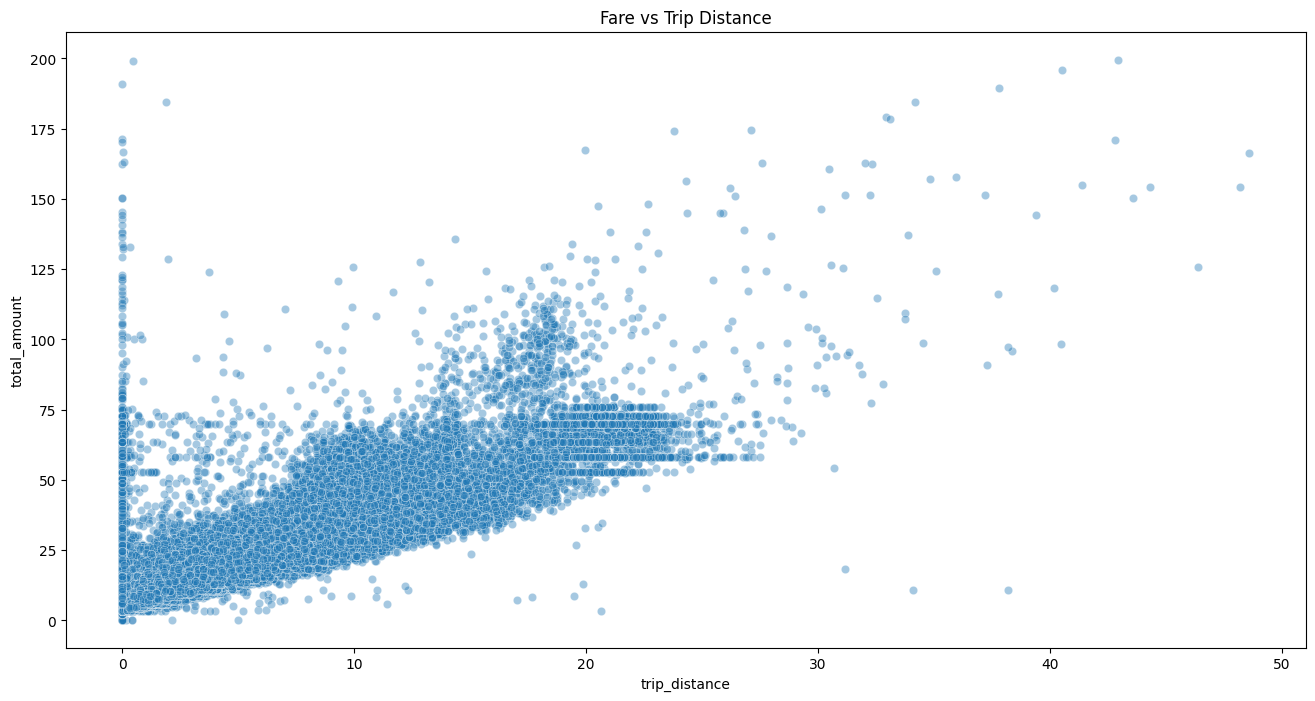

In [56]:

# Plot 1: Fare vs Trip Distance
plt.figure(figsize=(16, 8))
sns.scatterplot(data=final_dff, x='trip_distance', y='total_amount', alpha=0.4)
plt.title("Fare vs Trip Distance")
plt.show()

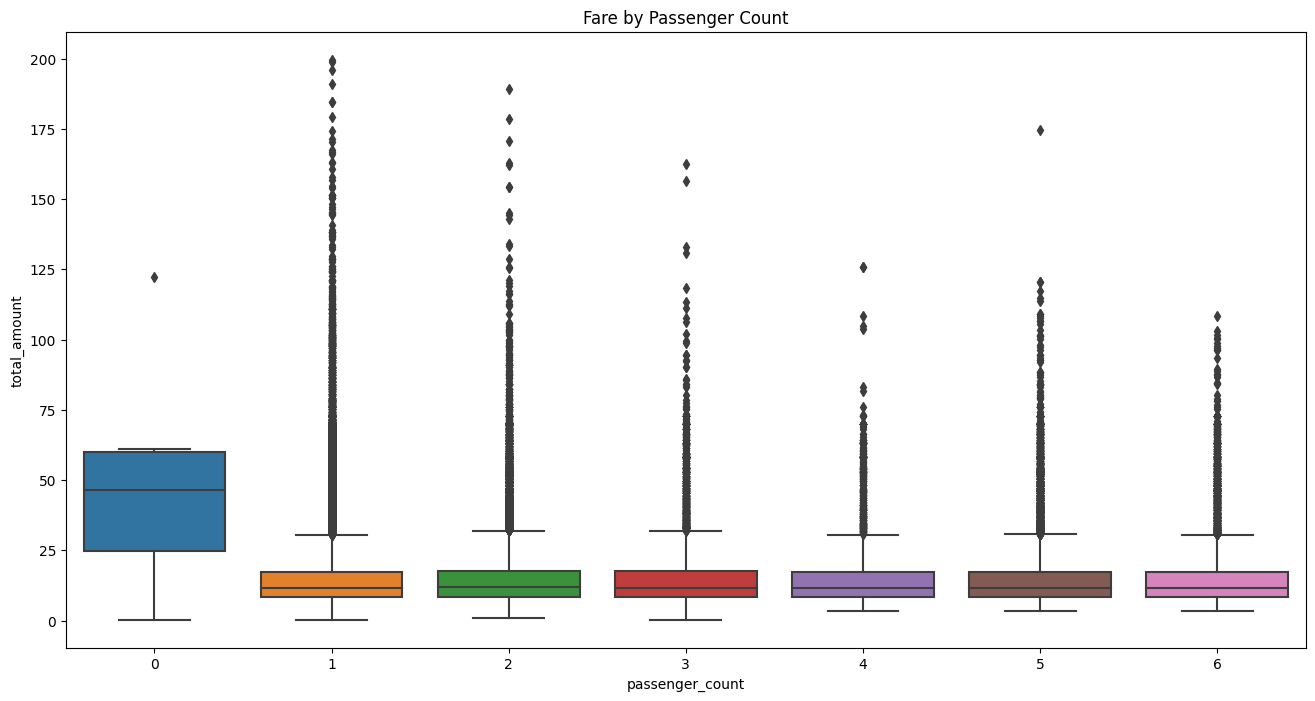

In [57]:
# Plot 2: Fare vs Passenger Count
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_dff, x='passenger_count', y='total_amount')
plt.title("Fare by Passenger Count")
plt.show()

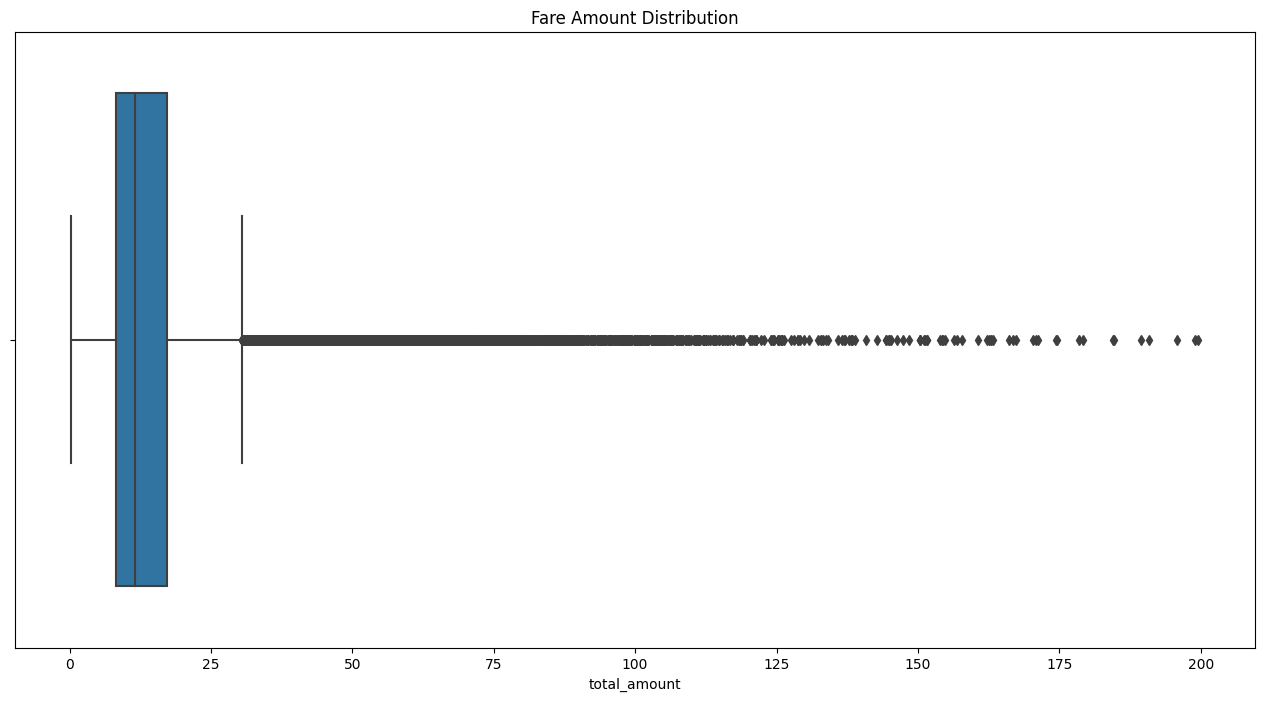

In [58]:
# Plot 3: Outlier Detection - Fare
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_dff, x='total_amount')
plt.title("Fare Amount Distribution")
plt.show()

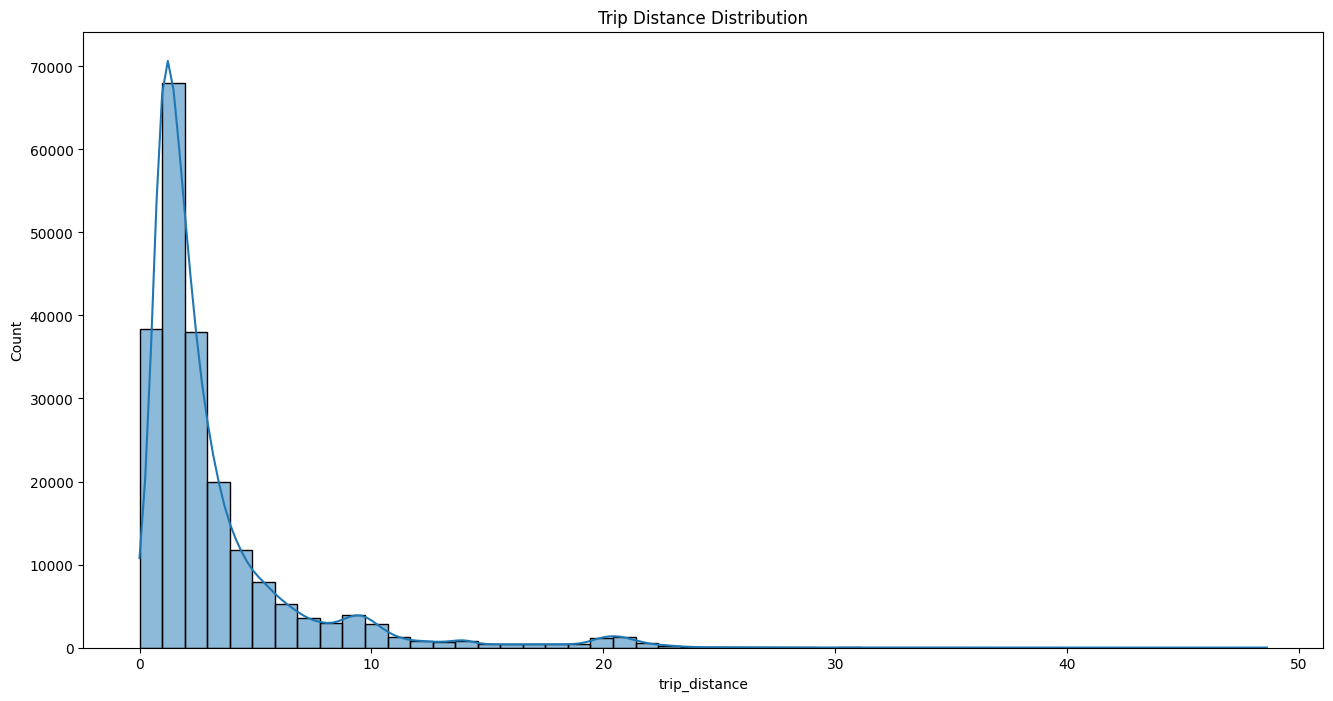

In [59]:
# Plot 4: Trip Distance Distribution
plt.figure(figsize=(16, 8))
sns.histplot(final_dff['trip_distance'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.show()

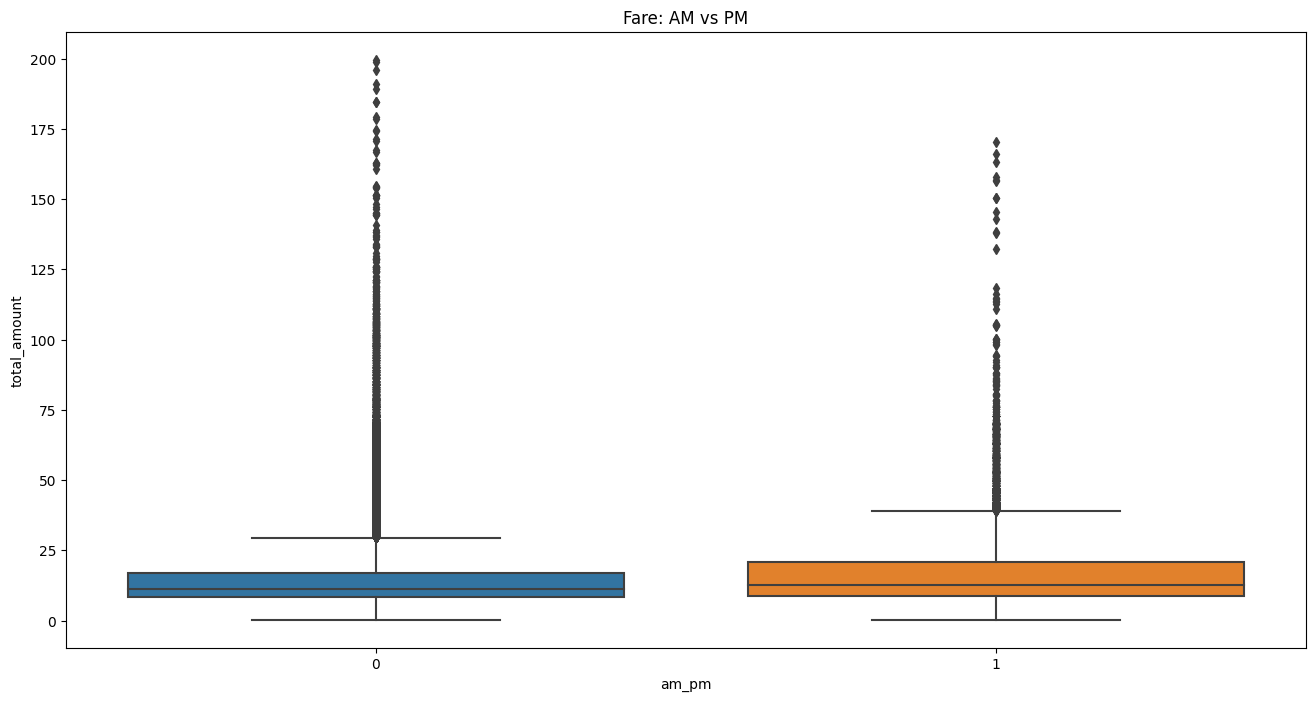

In [60]:
# Plot 5: Fare by AM/PM
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_dff, x='am_pm', y='total_amount')
plt.title("Fare: AM vs PM")
plt.show()


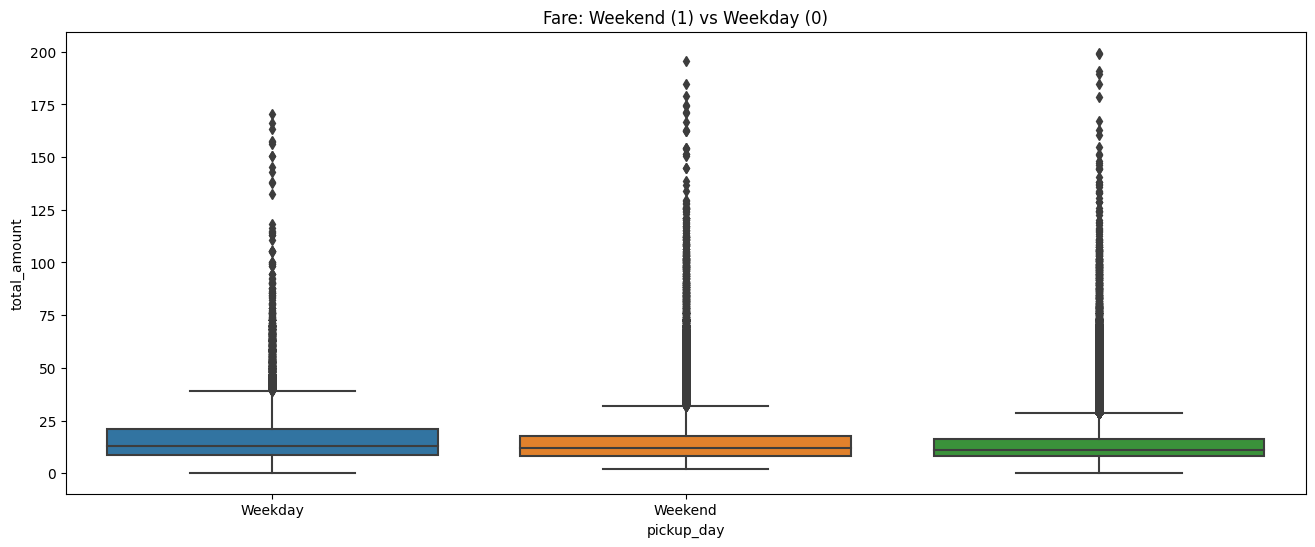

In [61]:
# Plot 6: Fare by Weekday/Weekend
plt.figure(figsize=(16, 6))
sns.boxplot(data=final_dff, x='pickup_day', y='total_amount')
plt.title("Fare: Weekend (1) vs Weekday (0)")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

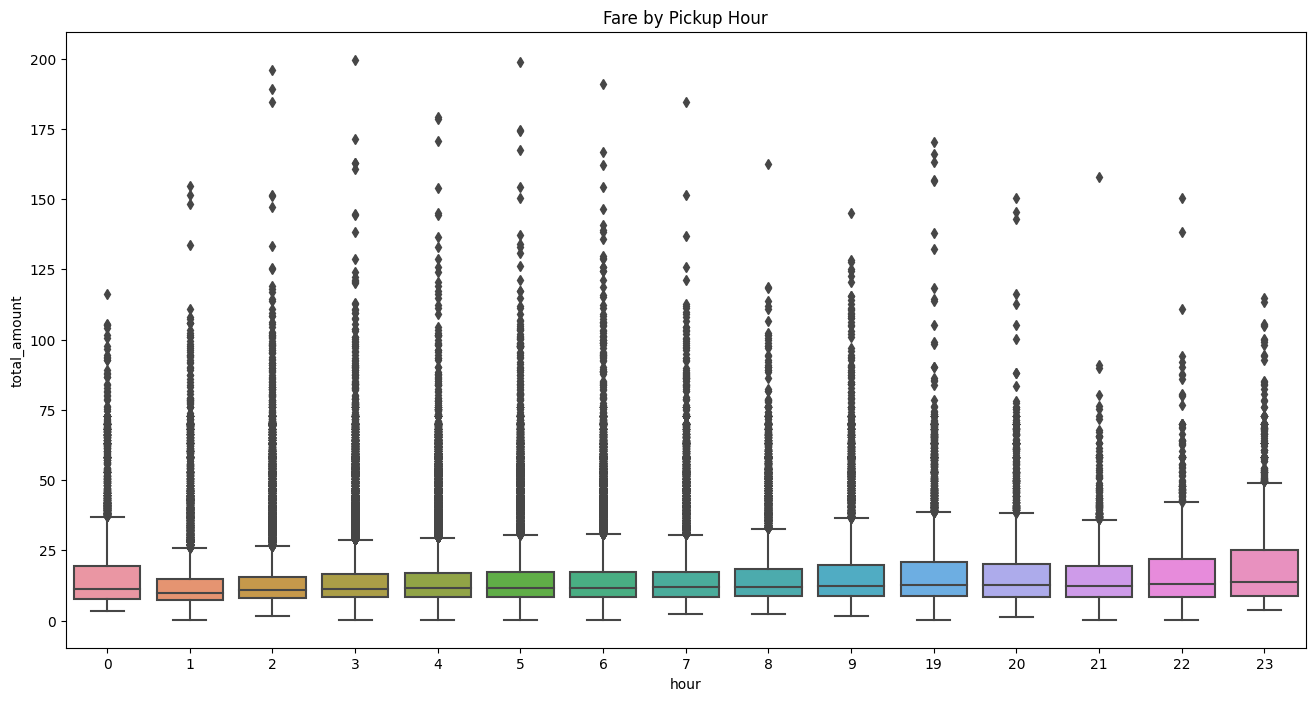

In [62]:
# Plot 7: Fare by Pickup Hour
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_dff, x='hour', y='total_amount')
plt.title("Fare by Pickup Hour")
plt.show()

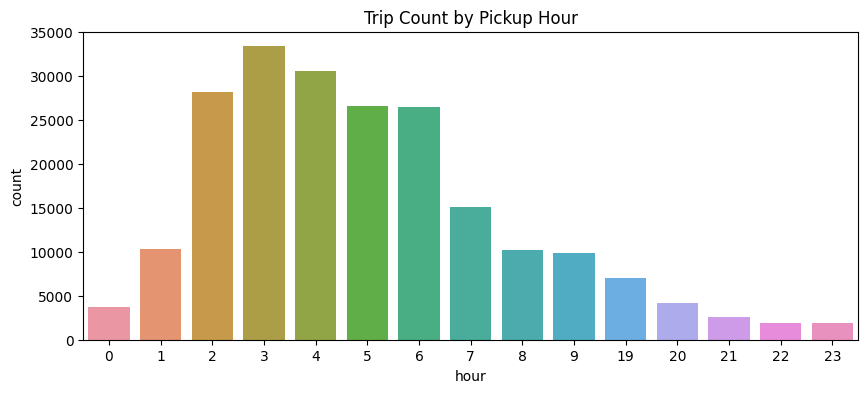

In [63]:
# Plot 8: Trip Count by Hour
plt.figure(figsize=(10, 4))
sns.countplot(data=final_dff, x='hour')
plt.title("Trip Count by Pickup Hour")
plt.show()

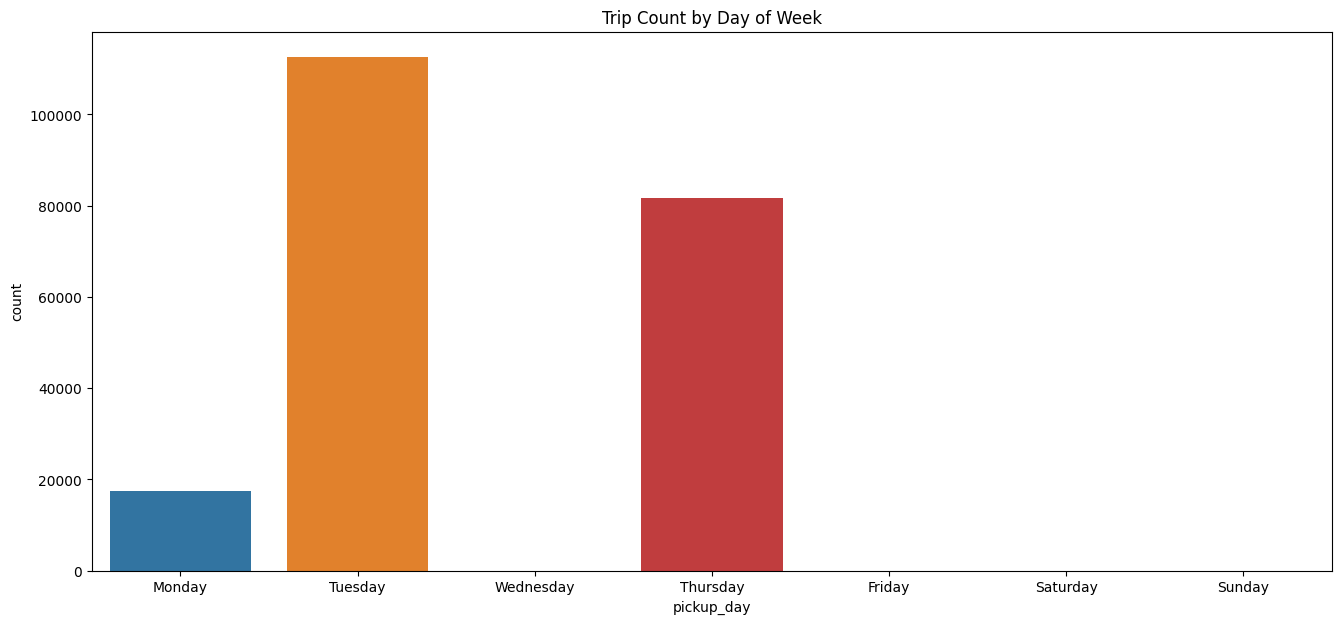

In [64]:
# Plot 9: Trip Count by Day of Week
plt.figure(figsize=(16, 7))
sns.countplot(data=final_dff, x='pickup_day', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Trip Count by Day of Week")
plt.show()


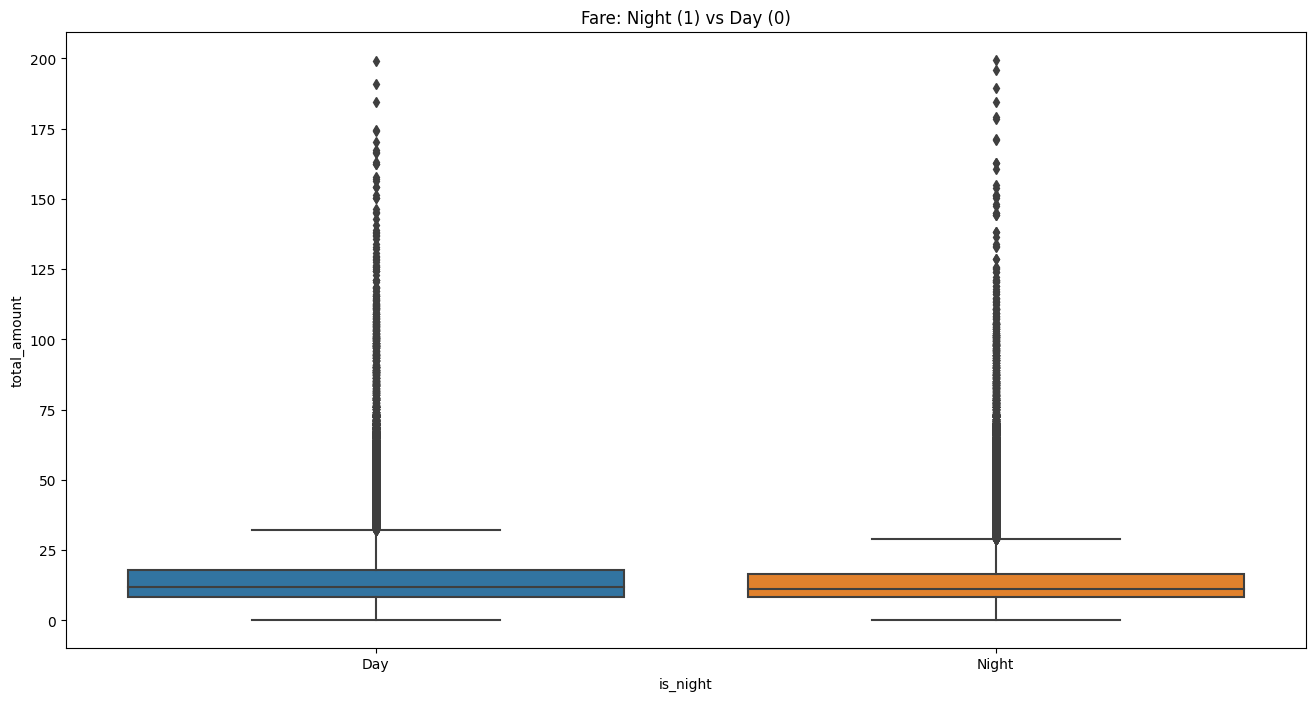

In [65]:
# Plot 10: Fare by Night (1) vs Day (0)
plt.figure(figsize=(16, 8))
sns.boxplot(data=final_dff, x='is_night', y='total_amount')
plt.title("Fare: Night (1) vs Day (0)")
plt.xticks([0, 1], ['Day', 'Night'])
plt.show()

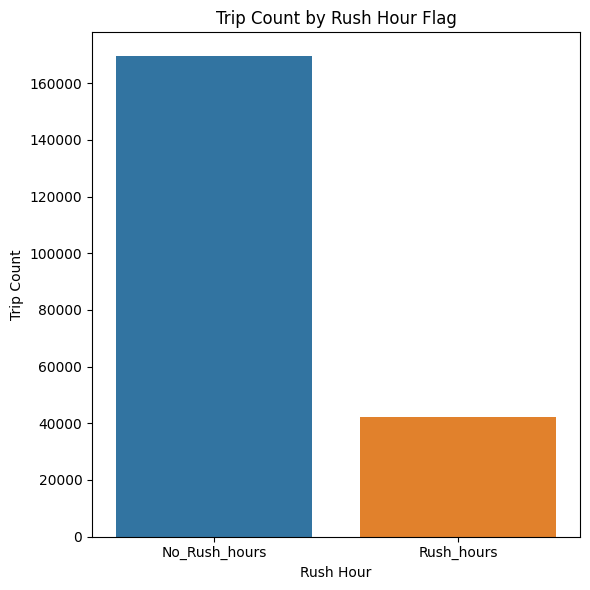

In [66]:
plt.figure(figsize=(6,6))
sns.countplot(data=final_dff, x='is_rush_hour')

plt.title("Trip Count by Rush Hour Flag")
plt.xlabel("Rush Hour")
plt.ylabel("Trip Count")

# Optional: rename x-axis tick labels for better clarity
plt.xticks([0, 1], ['No_Rush_hours', 'Rush_hours'])

plt.tight_layout()
plt.show()


In [67]:
final_dff.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.00,12.35,3.14,0,Monday,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.00,15.35,4.30,0,Monday,1,19,0,1,3.57,5.18
2,2,1,0.5,8.00,0.00,63.80,16.60,0,Monday,1,19,0,1,3.84,5.52
3,3,1,0.0,3.78,5.54,41.62,9.05,0,Monday,1,19,0,1,4.60,5.00
4,5,1,0.0,0.00,15.50,113.80,20.40,0,Monday,1,19,0,1,5.58,5.00


In [68]:
final_dff.shape

(211644, 15)

# 6.DATA TRANSFORMATION

## 6.1 HANDLING OUTLIERS

In [81]:
pip install scipy


     -------------------------------------- 34.1/34.1 MB 504.0 kB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.0.2 requires joblib>=0.11, which is not installed.


In [69]:
z_df=final_dff.copy()
iqr_df=final_dff.copy()

### 6.1.1.USING Z-SCORE METHOD

In [70]:

from scipy.stats import zscore

# Step 1: Calculate Z-scores
z_df['z_fare'] = zscore(z_df['total_amount'])

# Step 2: Create cleaned dataset
z_filtered = z_df[z_df['z_fare'].abs() <= 3].copy()

In [71]:
print(z_df.shape)
print(z_filtered.shape)

(211644, 16)
(205202, 16)


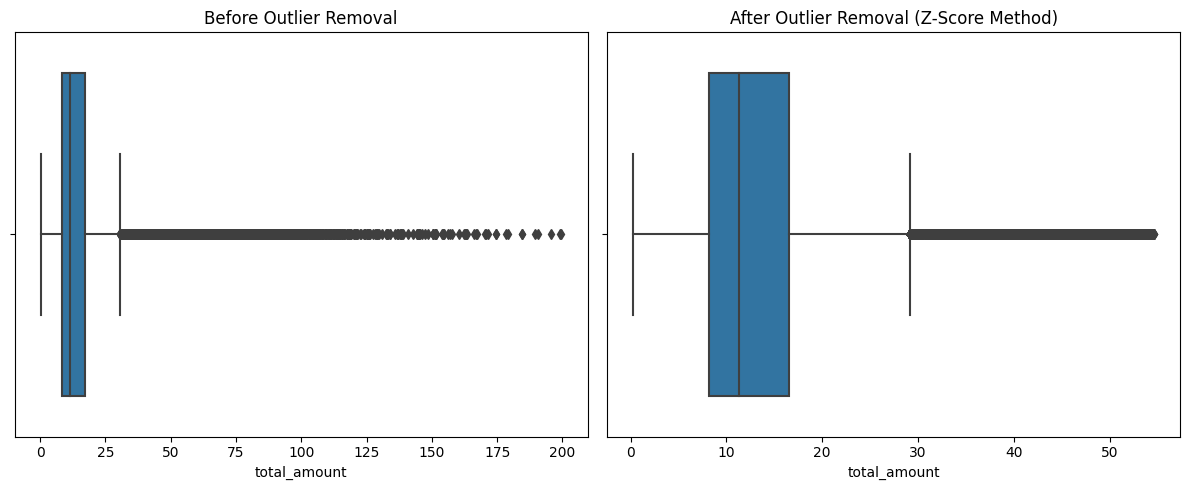

In [72]:
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.boxplot(x=z_df['total_amount'])
plt.title('Before Outlier Removal')

# After
plt.subplot(1, 2, 2)
sns.boxplot(x=z_filtered['total_amount'])
plt.title('After Outlier Removal (Z-Score Method)')

plt.tight_layout()
plt.show()


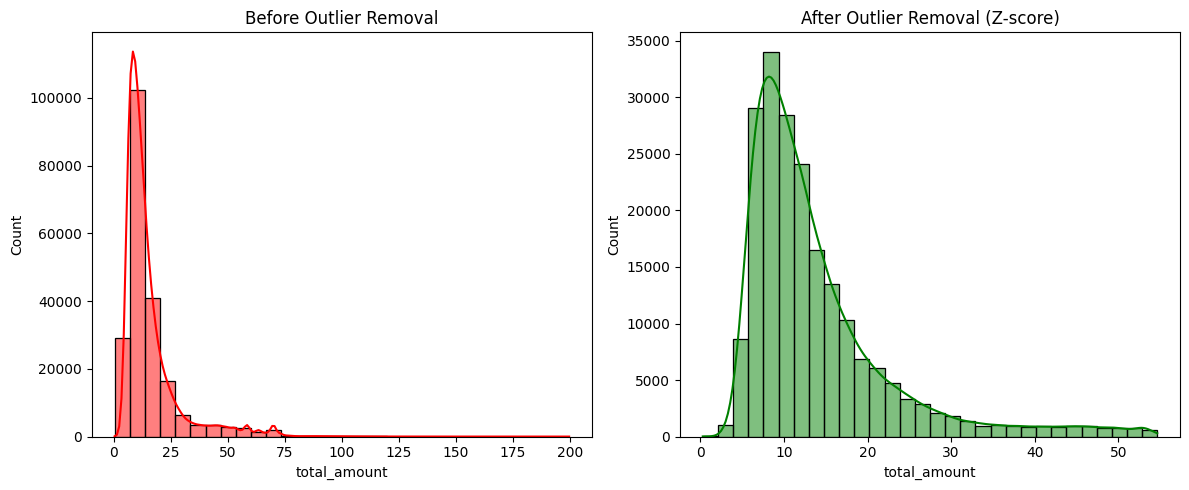

In [73]:
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.histplot(z_df['total_amount'], bins=30, kde=True, color='red')
plt.title('Before Outlier Removal')

# After
plt.subplot(1, 2, 2)
sns.histplot(z_filtered['total_amount'], bins=30, kde=True, color='green')
plt.title('After Outlier Removal (Z-score)')

plt.tight_layout()
plt.show()


### 📌NOTE:
**An outlier is any value that is more than 3 standard deviations from the mean.**

### OUTLIERS SHAPE

In [74]:
print(z_filtered.shape)

(205202, 16)


### 6.1.2.USING IQR(INTER QUARTILE RANGE) METHOD

In [75]:
Q1 = iqr_df['total_amount'].quantile(0.25)
Q3 = iqr_df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: keep rows within IQR bounds
df_iqr_cleaned = iqr_df[(iqr_df['total_amount'] >= lower_bound) & (iqr_df['total_amount'] <= upper_bound)]


### OUTLIERS

In [76]:
print("outliers data :",df_iqr_cleaned.shape)

outliers data : (192976, 15)


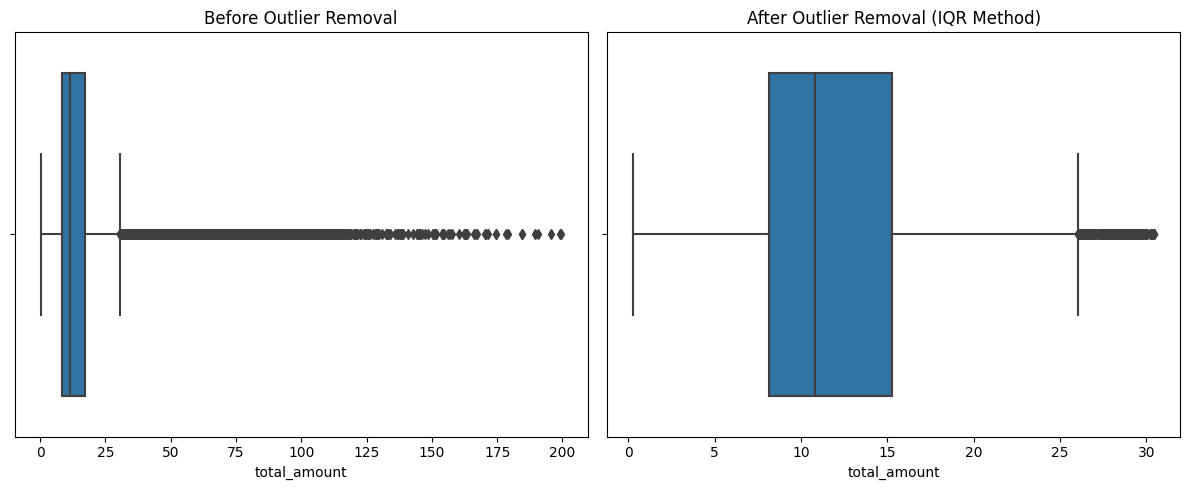

In [77]:
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.boxplot(x=iqr_df['total_amount'])
plt.title('Before Outlier Removal')

# After
plt.subplot(1, 2, 2)
sns.boxplot(x=df_iqr_cleaned['total_amount'])
plt.title('After Outlier Removal (IQR Method)')

plt.tight_layout()
plt.show()


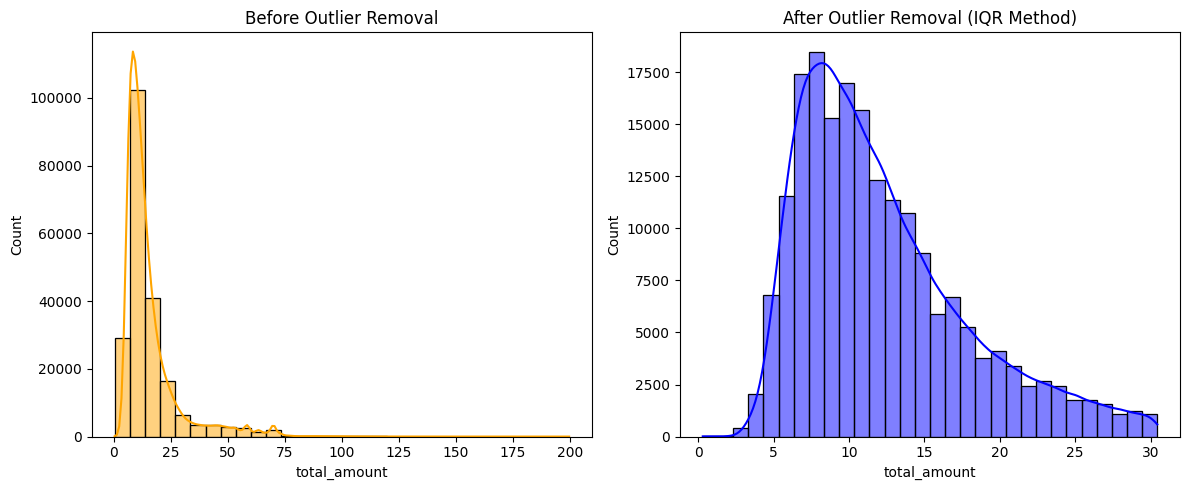

In [78]:
plt.figure(figsize=(12, 5))

# Before
plt.subplot(1, 2, 1)
sns.histplot(iqr_df['total_amount'], bins=30, kde=True, color='orange')
plt.title('Before Outlier Removal')

# After
plt.subplot(1, 2, 2)
sns.histplot(df_iqr_cleaned['total_amount'], bins=30, kde=True, color='blue')
plt.title('After Outlier Removal (IQR Method)')

plt.tight_layout()
plt.show()


### 6.2.FIXING SKEWNESS

**Fixing skewness in continuous variables is a crucial step to improve model performance especially for linear models, as they assume normally distributed features.**

**Skew = 0 → Normal**

**Skew > +1 → Right skewed (long tail right)**

**Skew < -1 → Left skewed**



### CHECK SKEWNESS

In [79]:
Skewness = df_iqr_cleaned.skew()
print("Skewness: \n", Skewness)

Skewness: 
 passenger_count      1.889504
payment_type         0.830421
extra                2.776684
tip_amount           1.051855
tolls_amount        27.082662
total_amount         1.020279
trip_distance        1.815728
pickup_dayofweek     0.258075
am_pm                3.088938
hour                 2.164496
is_night            -0.095645
is_rush_hour         1.550272
fare_per_km         49.117286
trip_duration       25.931073
dtype: float64


C:\Users\iswar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [80]:
df_iqr_cleaned.head(3)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,pickup_day,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.0,12.35,3.14,0,Monday,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.0,15.35,4.30,0,Monday,1,19,0,1,3.57,5.18
5,5,1,1.0,5.06,0.0,30.36,6.50,0,Monday,1,19,0,1,4.67,5.00


In [81]:
df_iqr_cleaned = df_iqr_cleaned.drop(['pickup_day'], axis='columns')

In [82]:
df_iqr_cleaned

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0,1,3.57,5.18
5,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0,1,4.67,5.00
7,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0,1,2.74,5.27
8,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0,1,10.48,5.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,1,1,0.0,3.36,0.0,20.16,3.81,1,0,7,0,1,5.29,5.39
212341,1,1,0.0,2.00,0.0,18.30,3.50,1,0,7,0,1,5.23,5.38
212342,1,1,0.0,0.00,0.0,4.80,0.58,1,0,7,0,1,8.28,5.04
212343,2,2,0.0,0.00,0.0,7.80,1.56,1,0,7,0,1,5.00,5.12


In [83]:
from scipy.stats import boxcox

# Create transformed versions (add +1 to avoid log(0))
iqr_df['log_fare'] = np.log1p(iqr_df['total_amount'])
iqr_df['sqrt_fare'] = np.sqrt(iqr_df['total_amount'])
iqr_df['bc_fare'], _ = boxcox(iqr_df['total_amount'] + 1)

iqr_df['log_distance'] = np.log1p(iqr_df['trip_distance'])
iqr_df['sqrt_distance'] = np.sqrt(iqr_df['trip_distance'])
iqr_df['bc_distance'], _ = boxcox(iqr_df['trip_distance'] + 1)


In [84]:
skew_summary = pd.DataFrame({
    'Feature': ['Original', 'Log Transform', 'Sqrt Transform', 'Box-Cox'],
    'Fare_Skewness': [
        iqr_df['total_amount'].skew(),
        iqr_df['log_fare'].skew(),
        iqr_df['sqrt_fare'].skew(),
        iqr_df['bc_fare'].skew()
    ],
    'Distance_Skewness': [
        iqr_df['trip_distance'].skew(),
        iqr_df['log_distance'].skew(),
        iqr_df['sqrt_distance'].skew(),
        iqr_df['bc_distance'].skew()
    ]
})

print(skew_summary)


          Feature  Fare_Skewness  Distance_Skewness
0        Original       3.031963           3.017627
1   Log Transform       0.936109           0.909615
2  Sqrt Transform       1.799198           1.481029
3         Box-Cox       0.018332           0.024071


### NOTE:
**Lower skewness (closer to 0) = better normality.**


**The lower the absolute skewness (closer to 0), the more normal the distribution becomes.**

**Skewness < |0.5| is typically considered acceptably symmetric for modeling.**

### Conclusion
#### Best Transformation: Box-Cox

**It dramatically reduces skewness for both total_amount and trip_distance:**

**Fare Skewness: 3.03 → 0.018**

**Distance Skewness: 3.02 → 0.024**

In [85]:
print(skew_summary.columns)

Index(['Feature', 'Fare_Skewness', 'Distance_Skewness'], dtype='object')


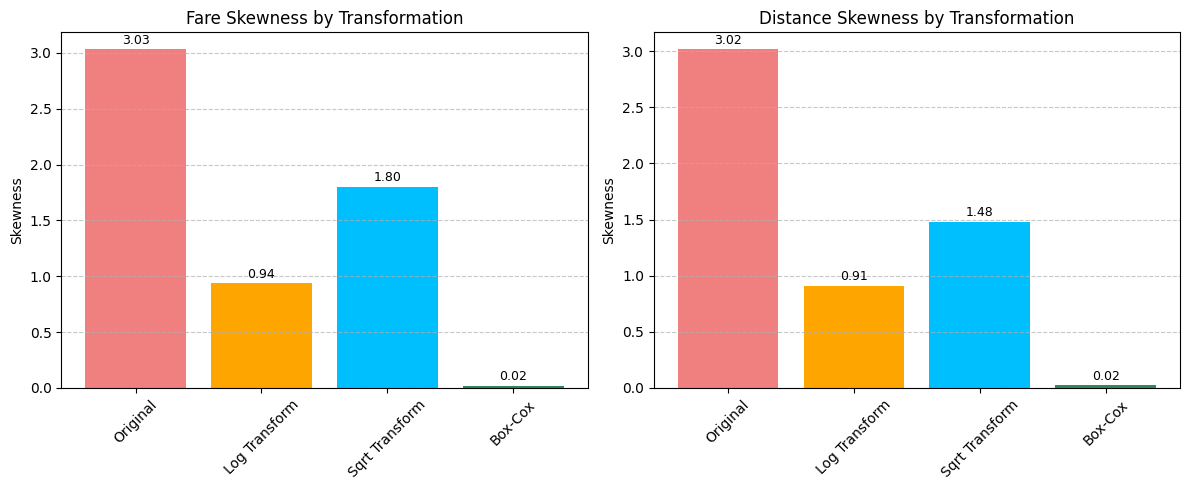

In [86]:
colors = ['lightcoral', 'orange', 'deepskyblue', 'seagreen']  # Match row order

plt.figure(figsize=(12, 5))

#Fare Skewness
plt.subplot(1, 2, 1)
plt.bar(skew_summary['Feature'], skew_summary['Fare_Skewness'], color=colors)
plt.title('Fare Skewness by Transformation', fontsize=12)
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, val in enumerate(skew_summary['Fare_Skewness']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', fontsize=9)

#Distance Skewness
plt.subplot(1, 2, 2)
plt.bar(skew_summary['Feature'], skew_summary['Distance_Skewness'], color=colors)
plt.title('Distance Skewness by Transformation', fontsize=12)
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, val in enumerate(skew_summary['Distance_Skewness']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', fontsize=9)

# Layout and show
plt.tight_layout()
plt.show()


### CLEANED DATASET

In [87]:
df_iqr_cleaned.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0,1,3.57,5.18
5,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0,1,4.67,5.00
7,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0,1,2.74,5.27
8,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0,1,10.48,5.08


In [88]:
df_iqr_cleaned.columns

Index(['passenger_count', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_distance', 'pickup_dayofweek',
       'am_pm', 'hour', 'is_night', 'is_rush_hour', 'fare_per_km',
       'trip_duration'],
      dtype='object')

In [89]:
# For reset index
df_iqr_cleaned = df_iqr_cleaned.reset_index(drop=True)

In [90]:
df_iqr_cleaned.to_csv("data_cleaned.csv",index=False)

In [91]:
cleaned_data = pd.read_csv('data_cleaned.csv')

In [92]:
cleaned_data.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0,1,3.57,5.18
2,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0,1,4.67,5.00
3,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0,1,2.74,5.27
4,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0,1,10.48,5.08


# 7.FEATURE SELECTION

## 7.1.CORRELATION ANALYSIS

In [93]:
# Example numerical columns
corr_features = ['trip_distance','tip_amount','trip_duration','tolls_amount','hour','am_pm','extra','is_rush_hour','pickup_dayofweek','passenger_count','fare_per_km','is_night','payment_type','total_amount']
correlation_matrix = df_iqr_cleaned.corr()


In [94]:
# Show correlation with the target variable 'total_amount'
target_corr = correlation_matrix['total_amount'].sort_values(ascending=False)
print(target_corr)


total_amount        1.000000
trip_distance       0.821945
tip_amount          0.582569
trip_duration       0.123301
tolls_amount        0.086946
hour                0.074283
am_pm               0.054108
extra               0.042374
is_rush_hour        0.031645
pickup_dayofweek    0.009458
passenger_count     0.008561
fare_per_km        -0.020432
is_night           -0.047710
payment_type       -0.212895
Name: total_amount, dtype: float64


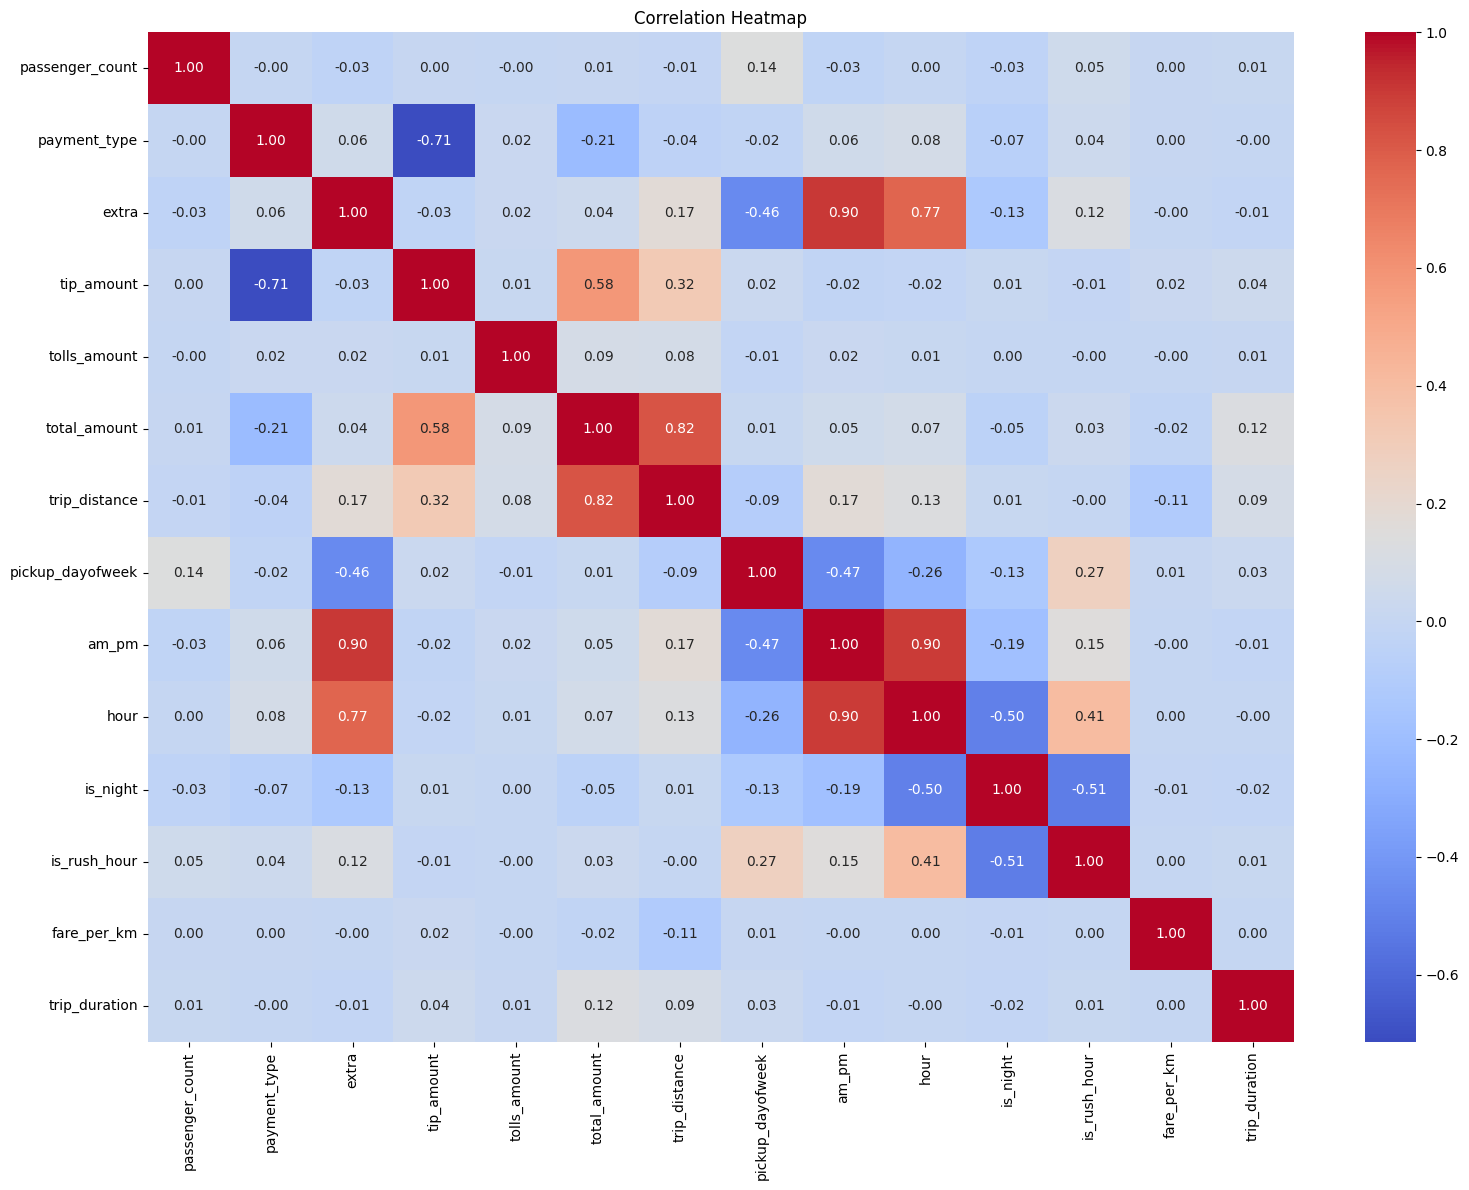

In [95]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()

# Save before showing the plot
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


### NOTE:
🔴 Red = strong positive correlation

🔵 Blue = strong negative correlation

⚪ Near 0 = no correlation

### 1. trip_distance vs. total_amount
Correlation: 0.82

--> **Very strong positive correlation**

--> Interpretation: As trip distance increases, fare amount increases consistently.

--> Most important predictor of total fare.

### 2. tip_amount vs. total_amount
Correlation: 0.58

--> **Moderate to strong correlation**

--> Interpretation: Higher tips are often associated with longer or costlier rides.

### 3. extra → total_amount
Correlation: +0.09 → Weak

--> Possible interpretation: Extra fees (like night surcharge), but not always applied

--> Optional for modeling

### 4. trip_duration vs. total_amount
Correlation: 0.12

--> **Weak correlation**

--> Possibly due to traffic delays not affecting fare much.

--> Can be considered but may not be very predictive alone.

### 4. fare_per_km, payment_type vs. total_amount
Correlation: -0.02,–0.21

--> **Very weak negative correlation**

--> Likely not useful for predicting total fare — could be removed.

### 5. pickup_dayofweek, passenger_count,
Correlations: ~0.01

--> No meaningful impact on fare

--> Can be excluded from the regression model

**SUMMARY:**

From the correlation heatmap, we observe that trip_distance is the strongest predictor of total_amount with a correlation of 0.82. tip_amount also shows a moderately strong relationship with the total fare (0.58), likely reflecting longer or more expensive trips.

Features like pickup_dayofweek, passenger_count, and fare_per_km exhibit almost no correlation and may be excluded from modeling to improve efficiency.

In [97]:
df_iqr_cleaned.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night,is_rush_hour,fare_per_km,trip_duration
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0,1,3.93,5.13
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0,1,3.57,5.18
2,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0,1,4.67,5.00
3,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0,1,2.74,5.27
4,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0,1,10.48,5.08


In [98]:
df_iqr_cleaned = df_iqr_cleaned.drop(['fare_per_km','trip_duration','is_rush_hour'], axis='columns')
df_iqr_cleaned.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0
2,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0
3,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0
4,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0


# CLEANED DATASET

In [99]:
# For reset index
df_iqr_cleaned = df_iqr_cleaned.reset_index(drop=True)

In [100]:
df_iqr_cleaned.to_csv("data_cleaned.csv",index=False)

In [101]:
data = pd.read_csv('data_cleaned.csv')

In [102]:
data.head()

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night
0,1,1,0.5,2.05,0.0,12.35,3.14,0,1,19,0
1,1,1,0.5,3.05,0.0,15.35,4.30,0,1,19,0
2,5,1,1.0,5.06,0.0,30.36,6.50,0,1,19,0
3,1,3,0.5,0.00,0.0,21.80,7.95,0,1,19,0
4,1,1,0.5,2.00,0.0,8.80,0.84,0,1,19,0


In [103]:
data.columns

Index(['passenger_count', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_distance', 'pickup_dayofweek',
       'am_pm', 'hour', 'is_night'],
      dtype='object')

# 8.MODEL BUILDING

## 8.1.IMPORTING LIBRARIES

In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
     -------------------------------------- 125.4/125.4 MB 3.3 MB/s eta 0:00:00



In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## 8.2.SELECT FEATURES AND TARGET

In [105]:
#'total_amount' is your target variable,it should not be included as a feature and drop as feature.
X = data.drop('total_amount',axis=1)


#selects the column 'total_amount' as your target variable (y).
y = data['total_amount']

## 8.3.TRAINING AND TESTING DATASET SPLITING

### 8.3.1.SPLITING TRAINING DATASET-70% AND TESTING DATASET-30%

In [106]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [107]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {                
        "R2 Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    }    
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).transpose()
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.810521,5.902066,2.429417,1.709256
Ridge Regression,0.810521,5.902070,2.429418,1.709258
Lasso Regression,0.765539,7.303204,2.702444,2.025115
Random Forest,0.870938,4.020147,2.005030,1.130742
Decision Tree Regressor,0.816585,5.713195,2.390229,1.289677
XGBoost Regressor,0.892184,3.358367,1.832585,1.136493


### 8.3.2.SPLITING TRAINING DATASET-75% AND TESTING DATASET-25%

In [108]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [109]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {                
        "R2 Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    }    
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).transpose()
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.814157,5.803191,2.408981,1.714482
Ridge Regression,0.814156,5.803201,2.408983,1.714485
Lasso Regression,0.767163,7.270623,2.696409,2.031200
Random Forest,0.872222,3.990021,1.997504,1.128539
Decision Tree Regressor,0.816310,5.735960,2.394986,1.292073
XGBoost Regressor,0.892534,3.355763,1.831874,1.139044


### 8.3.3.SPLITING TRAINING DATASET-80% AND TESTING DATASET-20%

In [110]:
# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {                
        "R2 Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    }    
    
# Convert results to DataFrame
results_df = pd.DataFrame(results).transpose()
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.814102,5.785991,2.405409,1.709135
Ridge Regression,0.814102,5.785991,2.405409,1.709136
Lasso Regression,0.767134,7.247846,2.692182,2.023352
Random Forest,0.872758,3.960353,1.990064,1.119833
Decision Tree Regressor,0.821125,5.567390,2.359532,1.280532
XGBoost Regressor,0.893136,3.326092,1.823758,1.132378


### How to evaluate

Compare models using the same test set and evaluate them on:

    	             
1. R² Score -->   How well the model explains variance (closer to 1 is better)

2. MAE	     -->   Mean  error in original units (lower is better)
 
3. RMSE	 -->   Penalizes large errors (lower is better)

4. MSE	     -->   Squared error (less interpretable, but useful for comparisons)

### Best performer of overall model is 'XGBoost Regressor'

Highest R²: Explains 89.3% of variance

Lowest MSE/RMSE: Most accurate predictions

Reliable generalization on unseen data

Slightly higher MAE than Random Forest, but overall stronger performer

## 8.4.HYPERPARAMETER TUNING RANDOMIZEDSEARCH CV

In [112]:
# Define the model
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   scoring='r2',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)

# Best estimator
best_xgb = random_search.best_estimator_
print("Best Hyperparameters:\n", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


## 8.5.CROSS VALIDATION OF BEST MODEL

In [113]:
from sklearn.model_selection import cross_val_score


# Cross-validate R² score
cv_scores = cross_val_score(best_xgb, X, y, cv=5, scoring='r2')
print("Cross-Validated R2 Scores:", cv_scores)
print("Average R2 Score:", np.mean(cv_scores))

Cross-Validated R2 Scores: [0.90140583 0.88706219 0.88862933 0.89549134 0.88239382]
Average R2 Score: 0.8909965023288328


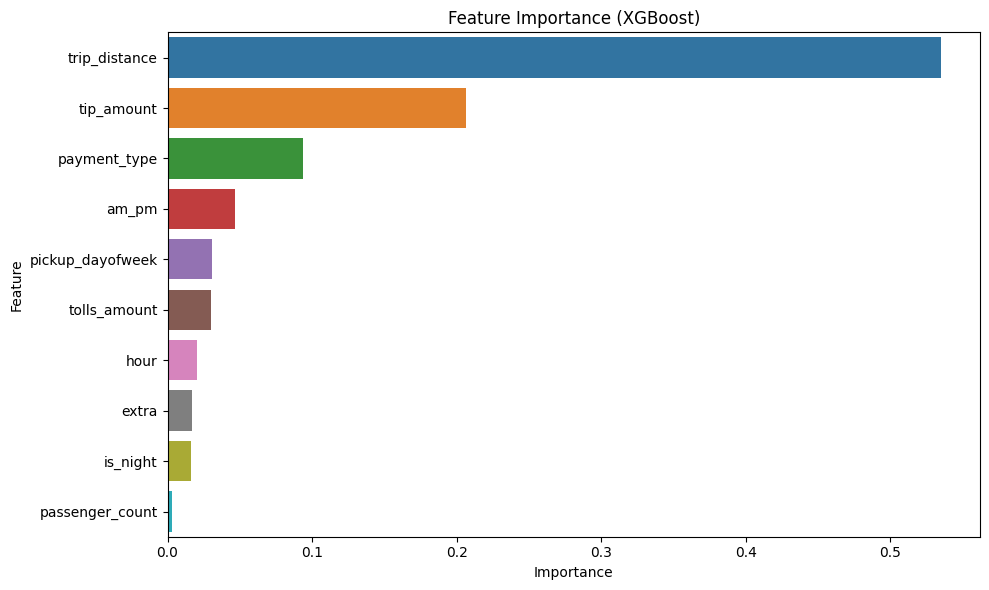

In [114]:
# Fit best model
best_xgb.fit(X_train, y_train)

# Get feature importance
importances = best_xgb.feature_importances_
features = X.columns

# Create DataFrame for plotting
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (XGBoost)')
plt.tight_layout()
plt.show()

In [115]:
X_train.sample(1)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night
5701,1,1,0.0,2.16,0.0,3.66,3,0,2,1


In [118]:
my_df = {
    "passenger_count": [int(input())],
    "payment_type": [int(input())],
    "extra": [float(input())],
    "tip_amount": [float(input())],
    "tolls_amount": [float(input())],
    "trip_distance": [float(input())],
    "day_of_week": [int(input())],
    "am_pm": [int(input())],
    "hour": [int(input())],
    "is_night": [int(input())]
}

input_data = pd.DataFrame(my_df)

1
1
0.0
2.16
0.0
3.66
3
0
2
1


In [119]:
input_data

,passenger_count,payment_type,extra,tip_amount,tolls_amount,trip_distance,day_of_week,am_pm,hour,is_night
0,1,1,0.0,2.16,0.0,3.66,3,0,2,1


In [120]:
input_data['trip_distance'] = np.log1p(input_data['trip_distance'])

In [121]:
input_data

,passenger_count,payment_type,extra,tip_amount,tolls_amount,trip_distance,day_of_week,am_pm,hour,is_night
0,1,1,0.0,2.16,0.0,1.539015,3,0,2,1


### NOTE:

#### Normalize the skewed distance data.
#### Reduce the effect of long distance outliers
#### Improve model performance

In [128]:
data.sample(3)

,passenger_count,payment_type,extra,tip_amount,tolls_amount,total_amount,trip_distance,pickup_dayofweek,am_pm,hour,is_night
9518,1,2,0.0,0.00,0.0,7.80,1.27,3,0,3,1
189781,1,1,0.0,2.25,0.0,13.55,2.39,1,0,7,0
183924,1,1,0.0,1.16,0.0,6.96,0.74,1,0,6,0


In [123]:
predicted_fare = best_xgb.predict(input_data)
print('Predicted_Fare is :',predicted_fare[0])

Predicted_Fare is : 12.418185


In [126]:
data['passenger_count'].unique()

array([1, 5, 3, 2, 4, 6, 0], dtype=int64)

# SAVING PREPROCESSOR

In [125]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)